In [1]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data_labelled/train/primary/CoreID6.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='primary', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data_labelled/train'
validation_data_dir = 'data_labelled/val'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [3]:
model.compile(
    optimizer='rmsprop',
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [4]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data_labelled/train/',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data_labelled/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 154 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [9]:
history = model.fit(
        train_generator,
        steps_per_epoch=100 // batch_size,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=800 // batch_size,
        verbose=2)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/25
6/6 - 1s - loss: 0.6686 - accuracy: 0.6562 - val_loss: 0.6816 - val_accuracy: 0.6000 - 1s/epoch - 167ms/step
Epoch 2/25
6/6 - 1s - loss: 0.6571 - accuracy: 0.6556 - 656ms/epoch - 109ms/step
Epoch 3/25
6/6 - 1s - loss: 0.6771 - accuracy: 0.6771 - 703ms/epoch - 117ms/step
Epoch 4/25
6/6 - 1s - loss: 0.6570 - accuracy: 0.6667 - 659ms/epoch - 110ms/step
Epoch 5/25
6/6 - 1s - loss: 0.6475 - accuracy: 0.6000 - 641ms/epoch - 107ms/step
Epoch 6/25
6/6 - 1s - loss: 0.6308 - accuracy: 0.6875 - 703ms/epoch - 117ms/step
Epoch 7/25
6/6 - 1s - loss: 0.6431 - accuracy: 0.6889 - 672ms/epoch - 112ms/step
Epoch 8/25
6/6 - 1s - loss: 0.6299 - accuracy: 0.6333 - 750ms/epoch - 125ms/step
Epoch 9/25
6/6 - 1s - loss: 0.6601 - accuracy: 0.6111 - 672ms/epoch - 112ms/step
Epoch 10/25
6/6 - 1s - loss: 0.6850 - accuracy: 0.6458 - 734ms/epoch - 122ms/step
Epoch 11/25
6/6 - 1s - loss: 0.6655 - accuracy: 0.6875 - 703ms/epoch - 117ms/step
Epoch 12/25
6/6 - 1s - loss: 0.6548 - accuracy: 0.6778 - 672ms/epoch

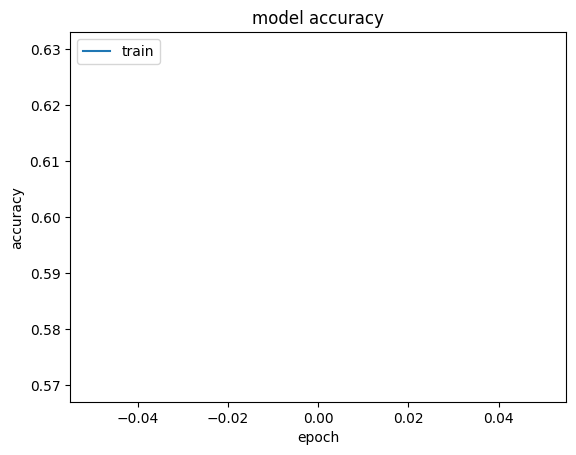

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

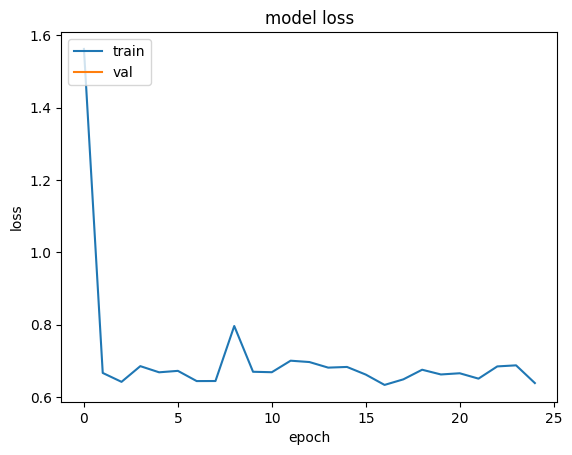

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()